In [6]:
from  PIL import Image, ImageOps
import numpy as np

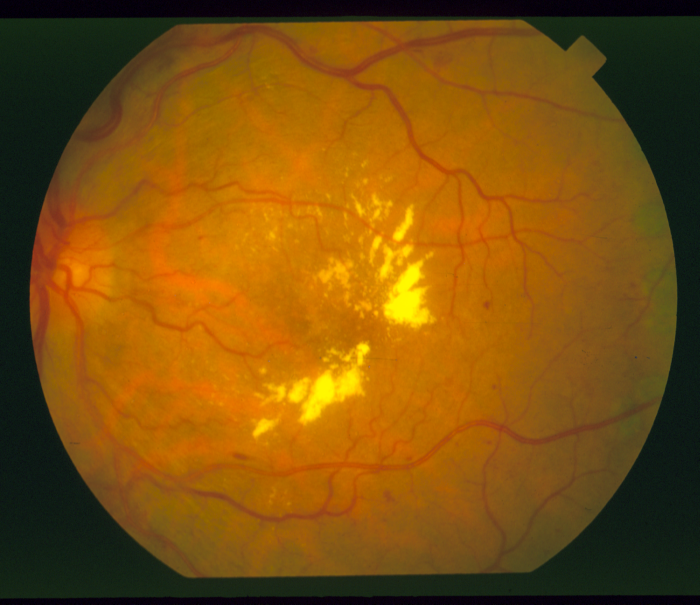

In [40]:
image = Image.open("images/im0001.ppm")
image

In [42]:
matrix = np.array(image)
w = image.width
h = image.height

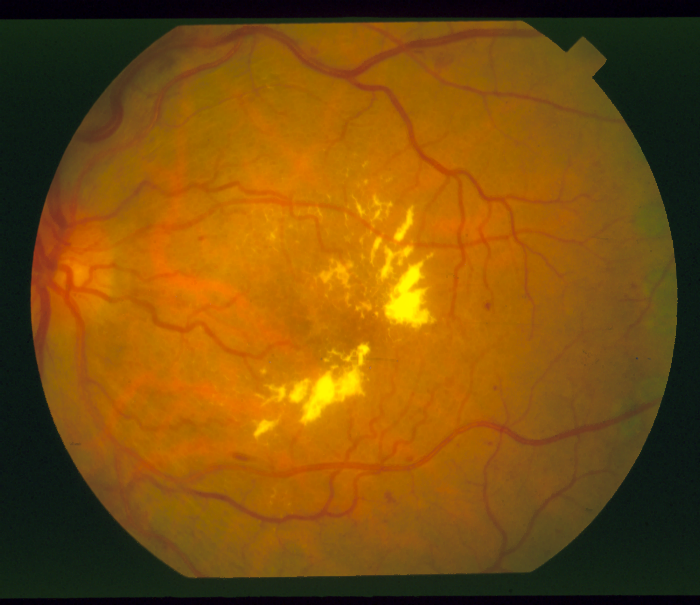

In [53]:
def compare(l1, l2):
    return l1[0] <= l2[0] and l1[1] <= l2[1] and l1[2] <= l2[2]
m = np.array(image)
n = 1
for i in range(h):
    for j in range(w):
        first = True
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    if first:
                        first = False
                        min = matrix[p][q]
                    elif compare(matrix[p][q], min):
                        min = matrix[p][q]
        m[i][j] = min
Image.fromarray(m)

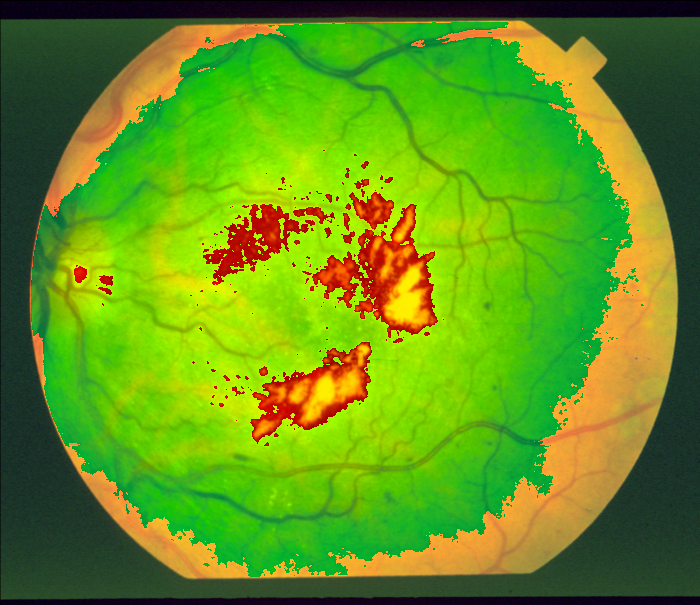

In [60]:
c = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
m = np.array(image)
n = 1
for i in range(h):
    for j in range(w):
        s = [0, 0, 0]
        for p in range(i - n, i + n):
            for q in range(j - n, j + n):
                if(p >= 0 and p < h and q >= 0 and q < w):
                    for k in range(0, 3):
                        s[k] += c[p - (i - n)][q - (j - n)] * matrix[p][q][k]
        for k in range(0, 3):
            m[i][j][k] = s[k]
Image.fromarray(m)